In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
import plotly.express as px

# First, let's import the code and clean the code.

## I'll take you through step by step. To start, let's import it!

In [3]:
Billboard_Charts = pd.read_csv('BillboardCharts.csv')

Spotify_Data = pd.read_csv('SpotifyTracks.csv')

### Let's do a quick check to make sure we properly sourced the data:

In [4]:
Billboard_Charts.head()

,date,rank,song,artists,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [5]:
Spotify_Data.head()

,number,track_id,artists,album_name,song,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Next, let's check to see if either of our data sets have any missing data.

In [6]:
print(Billboard_Charts.isnull().sum())

date                  0
rank                  0
song                  0
artists               0
last-week         32312
peak-rank             0
weeks-on-board        0
dtype: int64


In [7]:
print(Spotify_Data.isnull().sum())

number              0
track_id            0
artists             1
album_name          1
song                1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


### Okay! So, now we see that there are some missing values in the Spotify_Data CSV. Let's drop those!

In [8]:
Spotify_Data_Cleaned = Spotify_Data.dropna()

### Let's make sure it dropped properly:

In [9]:
print(Spotify_Data_Cleaned.isnull().sum())

number              0
track_id            0
artists             0
album_name          0
song                0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


### Because both of these data sets have so many songs listed in them, let's make sure there's no duplicate songs that have snuck their way in to either data set, just in case.

In [10]:
billboard_duplicates = Billboard_Charts.duplicated()

spotify_duplicates = Spotify_Data_Cleaned.duplicated()

print('In the Billboard data, there are ' + str(billboard_duplicates.sum()) + ' duplicate rows.')

print('In the Spotify Data, there are ' + str(spotify_duplicates.sum()) + ' duplicate rows.')

In the Billboard data, there are 0 duplicate rows.
In the Spotify Data, there are 0 duplicate rows.


### Great! Now, here is where we drop some columns from the cleaned data. 

There are a lot of columns, and we don't need them all to get the information we are seeking!



In [11]:
Billboard_Cleaned = Billboard_Charts.drop(columns=['last-week'])

Spotify_Cleaned = Spotify_Data_Cleaned.drop(columns=['duration_ms', 'popularity', 'explicit', 'track_id', 'number', 'instrumentalness', 'time_signature', 'mode', 'loudness'])

### Let's check to make sure the correct columns are gone!

In [12]:
Billboard_Cleaned.head()

,date,rank,song,artists,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,2,18


In [13]:
Spotify_Cleaned.head()

,artists,album_name,song,danceability,energy,key,speechiness,acousticness,liveness,valence,tempo,track_genre
0,Gen Hoshino,Comedy,Comedy,0.676,0.4610,1,0.1430,0.0322,0.3580,0.715,87.917,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.420,0.1660,1,0.0763,0.9240,0.1010,0.267,77.489,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.438,0.3590,0,0.0557,0.2100,0.1170,0.120,76.332,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.266,0.0596,0,0.0363,0.9050,0.1320,0.143,181.740,acoustic
4,Chord Overstreet,Hold On,Hold On,0.618,0.4430,2,0.0526,0.4690,0.0829,0.167,119.949,acoustic


## Awesome! 
### Now, we're going to combine the datasets.

In [14]:
HitSongs = pd.merge(Billboard_Cleaned, Spotify_Cleaned, on=['song', 'artists'])

### Let's check to see if it combined correctly!

In [15]:
HitSongs.head()

,date,rank,song,artists,peak-rank,weeks-on-board,album_name,danceability,energy,key,speechiness,acousticness,liveness,valence,tempo,track_genre
0,2021-11-06,1,Easy On Me,Adele,1,3,Easy On Me,0.604,0.366,5,0.0282,0.578,0.133,0.130,141.981,british
1,2021-11-06,1,Easy On Me,Adele,1,3,30,0.604,0.366,5,0.0282,0.578,0.133,0.130,141.981,british
2,2021-11-06,1,Easy On Me,Adele,1,3,Easy On Me,0.604,0.366,5,0.0282,0.578,0.133,0.130,141.981,soul
3,2021-11-06,1,Easy On Me,Adele,1,3,30,0.604,0.366,5,0.0282,0.578,0.133,0.130,141.981,soul
4,2021-11-06,4,Fancy Like,Walker Hayes,3,19,Country Stuff The Album,0.647,0.765,1,0.0600,0.111,0.315,0.855,79.994,country


### Woah! That is a lot of repeats. Let's try cleaning up this combined dataset.

In [16]:
HitSongs = HitSongs.dropna()

HitSongs = HitSongs.drop_duplicates(subset=['song', 'artists'])

In [17]:
HitSongs.head()

,date,rank,song,artists,peak-rank,weeks-on-board,album_name,danceability,energy,key,speechiness,acousticness,liveness,valence,tempo,track_genre
0,2021-11-06,1,Easy On Me,Adele,1,3,Easy On Me,0.604,0.366,5,0.0282,0.5780,0.1330,0.130,141.981,british
4,2021-11-06,4,Fancy Like,Walker Hayes,3,19,Country Stuff The Album,0.647,0.765,1,0.0600,0.1110,0.3150,0.855,79.994,country
5,2021-11-06,5,Bad Habits,Ed Sheeran,2,18,=,0.807,0.893,11,0.0347,0.0451,0.3660,0.537,126.011,pop
6,2021-11-06,7,Shivers,Ed Sheeran,7,7,Today's Party Hits,0.788,0.859,2,0.0856,0.2810,0.0424,0.822,141.020,pop
7,2021-11-06,10,Levitating,Dua Lipa,2,56,Future Nostalgia,0.695,0.884,6,0.0753,0.0561,0.2130,0.914,103.014,dance


## Nice!
### Now let's find some information data with this new dataframe! 

First, I'm interested in finding out what genre is the most popular for these songs! We're going to find this by looking at the mode!



In [18]:
genre_mode = HitSongs['track_genre'].mode()
print('The most popular genre for these songs is ' + genre_mode[0] + '.')

The most popular genre for these songs is grunge.


Out of curiosity, I just want a sneak peak as to what songs this dataset classifies as grunge!

In [19]:
# Out of curiosity, I just want a sneak peak as to what songs this dataset classifies as grunge!

grunge = HitSongs[HitSongs['track_genre'].str.contains('grunge', case=False, na=False)]

grunge[['song', 'artists', 'track_genre']].head()



,song,artists,track_genre
15998,Failure,Breaking Benjamin,grunge
19963,Sirens,Pearl Jam,grunge
22720,Bully,Shinedown,grunge
23109,When We Stand Together,Nickelback,grunge
23111,Crawling Back To You,Daughtry,grunge


I wasn't expecting grunge to be the most popular of those genres! How exciting!

Now, I want to see, on average, how many weeks these songs stayed on the Billboard Top 100 lists! We will do this using mean!

In [20]:
weeks_mean = HitSongs['weeks-on-board'].mean()

print(f'On average, songs would stay on the Billboard Top 100 list for {weeks_mean:.2f} weeks.')

On average, songs would stay on the Billboard Top 100 list for 17.72 weeks.


Okay, so 17 to 18 weeks on average! That is a lot longer than I expected. 

What songs do you think were on there that long? Let's take a little peak!

In [21]:
weeks_mean = HitSongs[(HitSongs['weeks-on-board'] >= 17) & (HitSongs['weeks-on-board'] <= 18)]

weeks_mean[['song', 'artists', 'weeks-on-board', 'track_genre']].head()

,song,artists,weeks-on-board,track_genre
5,Bad Habits,Ed Sheeran,18,pop
61,A-O-K,Tai Verdes,17,indie-pop
2120,X Gon' Give It To Ya,DMX,17,hardcore
3042,Some Girls,Jameson Rodgers,17,country
4881,Yo Perreo Sola,Bad Bunny,17,latino


Now, let's do a few quick calculations. I want to find the average and the most common results for the following columns: dancebility, energy, speechiness, acousticness, valence, and tempo.

First, let's look at the danceability of the songs. 

In [22]:
# danceability data

# mean
dance_mean = HitSongs['danceability'].mean()

print(f'On average, the songs danceability is {dance_mean:.3f}.')

# mode
dance_mode = HitSongs['danceability'].mode()

print(f'The most common danceability rating for the songs is {dance_mode[0]:.3f}.')

On average, the songs danceability is 0.577.
The most common danceability rating for the songs is 0.552.


In [23]:
# energy data

# mean
energy_mean = HitSongs['energy'].mean()

print(f'On average, the songs energy is {energy_mean:.3f}.')

# mode
energy_mode = HitSongs['energy'].mode()

print(f'The most common energy rating for the songs is {energy_mode[0]:.3f}.')

On average, the songs energy is 0.670.
The most common energy rating for the songs is 0.858.


In [24]:
# speechiness data

# mean
speechy_mean = HitSongs['speechiness'].mean()

print(f'On average, the songs speechiness is {speechy_mean:.3f}.')

# mode
speechy_mode = HitSongs['speechiness'].mode()

print(f'The most common speechiness rating for the songs is {speechy_mode[0]:.3f}.')

On average, the songs speechiness is 0.061.
The most common speechiness rating for the songs is 0.029.


In [25]:
# acousticness data

# mean
acoustics_mean = HitSongs['acousticness'].mean()

print(f'On average, the songs acousticness is {acoustics_mean:.3f}.')

# mode
acoustics_mode = HitSongs['acousticness'].mode()

print(f'The most common acousticness rating for the songs is {acoustics_mode[0]:.3f}.')

On average, the songs acousticness is 0.226.
The most common acousticness rating for the songs is 0.109.


In [26]:
# valence data

# mean
valence_mean = HitSongs['valence'].mean()

print(f'On average, the songs valence is {valence_mean:.3f}.')

# mode
valence_mode = HitSongs['valence'].mode()

print(f'The most common valence rating for the songs is {valence_mode[0]:.3f}.')

On average, the songs valence is 0.554.
The most common valence rating for the songs is 0.485.


In [27]:
# tempo data

# mean
tempo_mean = HitSongs['tempo'].mean()

print(f'On average, the songs valence is {tempo_mean:.3f}.')

# mode
tempo_mode = HitSongs['tempo'].mode()

print(f'The most common tempo rating for the songs is {tempo_mode[0]:.3f}.')

On average, the songs valence is 122.285.
The most common tempo rating for the songs is 77.004.


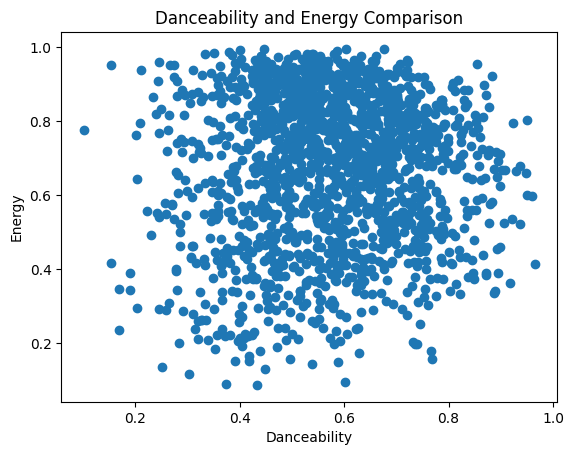

In [28]:
fig, ax = plt.subplots()
scatter = ax.scatter(HitSongs['danceability'], HitSongs['energy'])
mplcursors.cursor(scatter, hover = True).connect(
    "add", lambda sel: sel.annotation.set_text(HitSongs['song'][sel.index])
)

ax.set_title('Danceability and Energy Comparison')
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')

plt.show()